This notebook is for generating the player table from the games table.

In [33]:
#environment setup  C:\Users\Administrator\Desktop\simple eda\simple eda\EDA\player_table.ipynb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress


df=pd.read_csv('1410-1503results0.csv')

In [9]:
#统计每位棋手作为白方和黑方的对局数量
games_white = df.groupby('White').count()['Event'].sort_values(ascending=False).reset_index()
games_black = df.groupby('Black').count()['Event'].sort_values(ascending=False).reset_index()
#改列名
games_white.columns=['user', 'white_games']
games_black.columns=['user', 'black_games']
#df_games：user white_games black_games分别表示一个用户作为黑、白双方的游戏数量
df_games = pd.merge(games_white, games_black)
df_games['total_games'] = df_games.white_games + df_games.black_games #增加了total_games这一列
df_games = df_games.sort_values(by='total_games', ascending=False)#按照total_games这一列降序排列
#df_games.index = df_games.user

In [10]:
display(df_games)

,user,white_games,black_games,total_games
0,gumersindo,25,25,50
1,GeorgMeier,23,20,43
3,jcibarra,22,19,41
2,exoticprincess,22,17,39
5,pKiLz5Rn9b,18,21,39
...,...,...,...,...
223,DaPazz,1,1,2
225,DatsFunny,1,1,2
227,Room_for_Squares64,1,1,2
229,gmsakk,1,1,2


df_games looks like:   
| user    | white\_games | black\_games | total\_games |
| ------- | ------------ | ------------ | ------------ |
| Alice   | 3            | 1            | 4            |
| Bob     | 1            | 2            | 3            |
| Charlie | 1            | 2            | 3            |

In [4]:
df_wins_white = df[['White', 'Result', 'Event']].groupby(['White', 'Result']).count().reset_index()
df_wins_white = df_wins_white[df_wins_white.Result=='1-0'].groupby('White').sum()['Event'].reset_index()
df_wins_white.columns = ['user', 'wins_white']

df_wins_black = df[['Black', 'Result', 'Event']].groupby(['Black', 'Result']).count().reset_index()
df_wins_black = df_wins_black[df_wins_black.Result=='0-1'].groupby('Black').sum()['Event'].reset_index()
df_wins_black.columns = ['user', 'wins_black']
df_wins = pd.merge(df_wins_white, df_wins_black)#可能会有none值出现，并且索引只会出现赢过的人 一次都没赢的人不会出现
df_wins['wins_total'] = df_wins['wins_white'] + df_wins['wins_black']

In [6]:
display(df_wins)

,user,wins_white,wins_black,wins_total
0,162a54f5d,5,4,9
1,1random,1,2,3
2,1stSecond,6,3,9
3,9ShMat2,3,3,6
4,A-Fier,1,1,2
...,...,...,...,...
182,vovkcoach,7,6,13
183,wannabe2700,2,2,4
184,wonderfultime,10,9,19
185,xtremeungar,2,1,3


df_wins looks like:         (the index will only have user win at least 1 game)
| user    | wins\_white | wins\_black | wins\_total |
| ------- | ----------- | ----------- | ----------- |
| Alice   | 2           | 2           | 4           |
| Charlie | 0           | 1           | 1           |

In [14]:
df_draw_white = df[['White', 'Result', 'Event']].groupby(['White', 'Result']).count().reset_index()
df_draw_white = df_draw_white[df_draw_white.Result=='1/2-1/2'].groupby('White').sum()['Event'].reset_index()
df_draw_white.columns = ['user', 'draw_white']

df_draw_black = df[['Black', 'Result', 'Event']].groupby(['Black', 'Result']).count().reset_index()
df_draw_black = df_draw_black[df_draw_black.Result=='1/2-1/2'].groupby('Black').sum()['Event'].reset_index()
df_draw_black.columns = ['user', 'draw_black']
df_draw = pd.merge(df_draw_white, df_draw_black)
df_draw['draw_total'] = df_draw['draw_white'] + df_draw['draw_black']
display(df_draw)

,user,draw_white,draw_black,draw_total
0,162a54f5d,2,2,4
1,1stSecond,2,1,3
2,AUSSIE_PINOY,2,1,3
3,AndreyOstrovskiy,2,2,4
4,AnthonyWirig,1,1,2
...,...,...,...,...
61,rhungaski,4,2,6
62,ruzomberok,1,1,2
63,tac49,2,2,4
64,wonderfultime,2,3,5


In [15]:
df_lose_white = df[['White', 'Result', 'Event']].groupby(['White', 'Result']).count().reset_index()
df_lose_white = df_lose_white[df_lose_white.Result=='0-1'].groupby('White').sum()['Event'].reset_index()
df_lose_white.columns = ['user', 'lose_white']

df_lose_black = df[['Black', 'Result', 'Event']].groupby(['Black', 'Result']).count().reset_index()
df_lose_black = df_lose_black[df_lose_black.Result=='1-0'].groupby('Black').sum()['Event'].reset_index()
df_lose_black.columns = ['user', 'lose_black']
df_lose = pd.merge(df_lose_white, df_lose_black)#只会出现输过的人
df_lose['lose_total'] = df_lose['lose_white'] + df_lose['lose_black']
display(df_lose)

,user,lose_white,lose_black,lose_total
0,162a54f5d,5,3,8
1,190l,1,4,5
2,1stSecond,2,4,6
3,9ShMat2,1,1,2
4,A-Fier,1,1,2
...,...,...,...,...
202,vovkcoach,6,4,10
203,wannabe2700,2,3,5
204,wonderfultime,5,3,8
205,xtremeungar,2,3,5


In [18]:
df_all = pd.merge(df_games, df_wins, on='user', how='left')
df_all = pd.merge(df_all, df_draw, on='user', how='left')
df_all = pd.merge(df_all, df_lose, on='user', how='left')

# 如果需要把 NaN 填为 0（因为没赢过 / 没平过 / 没输过）：
df_all.fillna(0, inplace=True)

In [19]:
display(df_all)

,user,white_games,black_games,total_games,wins_white,wins_black,wins_total,draw_white,draw_black,draw_total,lose_white,lose_black,lose_total
0,gumersindo,25,25,50,10.0,10.0,20.0,4.0,4.0,8.0,11.0,11.0,22.0
1,GeorgMeier,23,20,43,18.0,11.0,29.0,4.0,6.0,10.0,1.0,3.0,4.0
2,jcibarra,22,19,41,13.0,13.0,26.0,3.0,2.0,5.0,6.0,4.0,10.0
3,exoticprincess,22,17,39,17.0,12.0,29.0,4.0,1.0,5.0,1.0,4.0,5.0
4,pKiLz5Rn9b,18,21,39,7.0,7.0,14.0,1.0,3.0,4.0,10.0,11.0,21.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,DaPazz,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
227,DatsFunny,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.0
228,Room_for_Squares64,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
229,gmsakk,1,1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df_all.to_csv('df_all.csv',index=False)

elo

In [28]:
white_elos = df[['White', 'WhiteElo']]
black_elos = df[['Black', 'BlackElo']]
white_elos.columns = ['user', 'elo']
black_elos.columns = ['user', 'elo']
df_elo = pd.concat([white_elos, black_elos])
df_elo = df_elo.groupby('user').mean().reset_index()#按user分组计算每个选手的平均ELO分，无论白方/黑方
df_elo_wins = pd.merge(df_elo, df_wins, on='user', how='left')  # 有elo但0胜的选手也保留，wins_total为NaN
df_elo_wins_games = pd.merge(df_elo_wins, df_games[['user','total_games']], on='user', how='left')
df_elo_wins_games['wins_total'] = df_elo_wins_games['wins_total'].fillna(0)  # 没赢过就视为0胜
df_elo_wins_games['win_ratio'] = df_elo_wins_games['wins_total'] / df_elo_wins_games['total_games']
df_elo_wins_games = df_elo_wins_games.fillna(0)

In [38]:
display(df_elo_wins_games)
df_elo_wins_games.to_csv('df_elo_wins.csv',index=False)

,user,elo,wins_white,wins_black,wins_total,total_games,win_ratio
0,162a54f5d,2300.476190,5.0,4.0,9.0,21.0,0.428571
1,190l,1981.222222,0.0,0.0,0.0,9.0,0.000000
2,1random,2019.800000,1.0,2.0,3.0,5.0,0.600000
3,1stSecond,2363.444444,6.0,3.0,9.0,18.0,0.500000
4,9ShMat2,2447.666667,3.0,3.0,6.0,9.0,0.666667
...,...,...,...,...,...,...,...
235,vovkcoach,2486.826087,7.0,6.0,13.0,23.0,0.565217
236,wannabe2700,2291.000000,2.0,2.0,4.0,9.0,0.444444
237,wonderfultime,2535.031250,10.0,9.0,19.0,32.0,0.593750
238,xtremeungar,2232.000000,2.0,1.0,3.0,9.0,0.333333


In [41]:
print(df_elo_wins_games.dtypes)
print(df_elo_wins_games[['elo', 'win_ratio']].head())

user            object
elo            float64
wins_white     float64
wins_black     float64
wins_total     float64
total_games    float64
win_ratio      float64
dtype: object
           elo  win_ratio
0  2300.476190   0.428571
1  1981.222222   0.000000
2  2019.800000   0.600000
3  2363.444444   0.500000
4  2447.666667   0.666667


In [40]:
# Carry out a linear regression of the win ratio (y) against ELO (x)
result = linregress(df_elo_wins_games.elo, df_elo_wins_games.win_ratio)

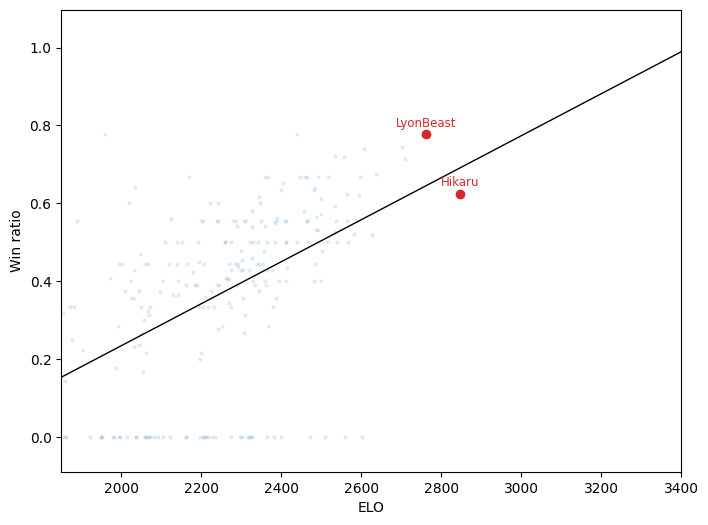

In [43]:
plt.figure(figsize=(8,6))
plt.plot(df_elo_wins_games.elo, df_elo_wins_games.win_ratio, 'o', alpha=0.1, ms=2)
elo_range = np.linspace(1500,3500, 10)
plt.plot(elo_range, result.slope*elo_range + result.intercept, 'k-', lw=1)

selected_users = ['Hikaru', 'MagnusCarlsen', 'LyonBeast', 'Miguelito', 'VincentKeymer', 'Jospem', 'ChessQueen', 'Goryachkina', 'AlexandraBotez']
for user in selected_users:
    df_select = df_elo_wins_games[df_elo_wins_games.user == user]
    if not df_select.empty:  # 只有非空才画点和标注
        plt.plot(df_select.elo, df_select.win_ratio, 'o', c='C3')
        plt.text(df_select.elo.iloc[0], df_select.win_ratio.iloc[0] + 0.02, user, fontsize=8.5, c='C3', horizontalalignment='center')
        
plt.ylabel('Win ratio')
plt.xlabel('ELO')
plt.xlim([1850,3400])
plt.show()


In [44]:
df_ea = pd.concat([df[['White', 
                       'White Accuracy', 
                       'WhiteElo', 
                       'White Beginning Accuracy', 
                       'White Middle Accuracy', 
                       'White Endgame Accuracy']].rename(columns={'White':'user', 
                                                                  'White Accuracy':'accuracy', 
                                                                  'WhiteElo':'elo', 
                                                                  'White Beginning Accuracy': 'accuracy_opening',
                                                                  'White Middle Accuracy': 'accuracy_middlegame',
                                                                  'White Endgame Accuracy': 'accuracy_endgame'}),
                
                   df[['Black', 
                       'Black Accuracy', 
                       'BlackElo', 
                       'Black Beginning Accuracy', 
                       'Black Middle Accuracy', 
                       'Black Endgame Accuracy']].rename(columns={'Black':'user',
                                                                  'Black Accuracy':'accuracy', 
                                                                  'BlackElo':'elo',
                                                                  'Black Beginning Accuracy': 'accuracy_opening',
                                                                  'Black Middle Accuracy': 'accuracy_middlegame',
                                                                  'Black Endgame Accuracy': 'accuracy_endgame'})], 
                        
                  axis=0)
df_ea = df_ea.dropna().groupby('user').mean().reset_index()
df_ea = df_ea[df_ea.accuracy>0]#排除准确率<0的异常数据


(1500.0, 3200.0)

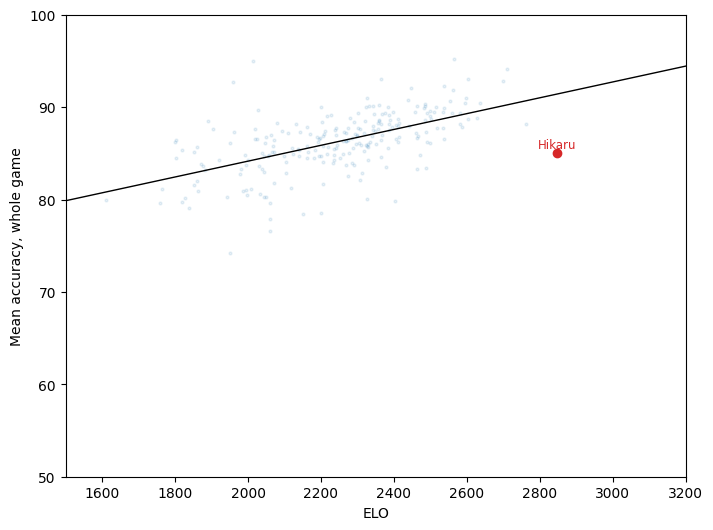

In [67]:
plt.figure(figsize=(8,6))
result2 = linregress(df_ea.dropna().elo, df_ea.dropna().accuracy)
elo_range2 = np.linspace(1500,3400, 10)
plt.plot(df_ea.elo, df_ea.accuracy, 'o', alpha=0.1, ms=2)
plt.plot(elo_range2, result2.slope*elo_range2+ result2.intercept, c='k', lw=1)

selected_users = ['Hikaru', 'MagnusCarlsen', 'Jospem', 'ChessQueen', 'Goryachkina', 'GothamChess', 'AlexandraBotez', 'VladimirKramnik']
for user in selected_users:
    df_select = df_ea[df_ea.user == user]
    plt.plot(df_select.elo, df_select.accuracy, 'o', c='C3')
    mean_elo = df_select.elo.mean()
    mean_acc = df_select.accuracy.mean()
    plt.text(mean_elo, mean_acc + 0.5, user, fontsize=8.5, c='C3', horizontalalignment='center')

plt.ylim([50,100])
plt.xlabel('ELO')
plt.ylabel('Mean accuracy, whole game')
plt.xlim([1500, 3200])

In [70]:
df_final = pd.merge(df_all, df_ea,on='user',how='left')
df_final = pd.merge(df_final, df_wins)
df_final['win_rate'] = df_final['wins_total']/df_final['total_games']
# distance is defined as e.g. opening_distance = accuracy_opening - accuracy
df_final['opening_distance'] = df_final['accuracy_opening'] - df_final['accuracy']
df_final['middlegame_distance'] = df_final['accuracy_middlegame'] - df_final['accuracy']
df_final['endgame_distance'] = df_final['accuracy_endgame'] - df_final['accuracy']


df_final['opening_distance_alt'] = df_final['accuracy_opening'] - df_final['accuracy_opening'].mean()
df_final['middlegame_distance_alt'] = df_final['accuracy_middlegame'] - df_final['accuracy_middlegame'].mean()
df_final['endgame_distance_alt'] = df_final['accuracy_endgame'] - df_final['accuracy_endgame'].mean()

In [65]:
display(df_final)

,user,white_games,black_games,total_games,wins_white,wins_black,wins_total,draw_white,draw_black,draw_total,...,accuracy_opening,accuracy_middlegame,accuracy_endgame,win_rate,opening_distance,middlegame_distance,endgame_distance,opening_distance_alt,middlegame_distance_alt,endgame_distance_alt
0,gumersindo,25,25,50,10.0,10.0,20.0,4.0,4.0,8.0,...,95.275388,90.103963,90.648649,0.400000,11.171706,6.000281,6.544967,0.192470,-1.170228,-1.191549
1,GeorgMeier,23,20,43,18.0,11.0,29.0,4.0,6.0,10.0,...,96.273201,93.342750,93.596919,0.674419,5.851737,2.921286,3.175455,1.190283,2.068558,1.756721
2,jcibarra,22,19,41,13.0,13.0,26.0,3.0,2.0,5.0,...,96.293663,92.738773,93.201212,0.634146,6.425462,2.870572,3.333011,1.210744,1.464581,1.361014
3,exoticprincess,22,17,39,17.0,12.0,29.0,4.0,1.0,5.0,...,95.150814,94.302936,95.729668,0.743590,2.355906,1.508029,2.934761,0.067896,3.028745,3.889470
4,pKiLz5Rn9b,18,21,39,7.0,7.0,14.0,1.0,3.0,4.0,...,94.173063,91.107121,92.255530,0.358974,7.029311,3.963369,5.111777,-0.909855,-0.167071,0.415332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,A-Fier,2,3,5,1.0,1.0,2.0,0.0,0.0,0.0,...,94.199162,88.702148,94.151831,0.400000,8.122286,2.625272,8.074956,-0.883756,-2.572044,2.311634
183,lestri,2,3,5,1.0,2.0,3.0,0.0,0.0,0.0,...,96.011691,91.949354,87.191387,0.600000,11.684474,7.622137,2.864170,0.928773,0.675163,-4.648811
184,quitforever,2,3,5,1.0,2.0,3.0,0.0,0.0,0.0,...,96.228091,91.663390,86.854558,0.600000,10.573920,6.009218,1.200387,1.145173,0.389198,-4.985639
185,diokletian,2,3,5,1.0,1.0,2.0,0.0,0.0,0.0,...,94.518443,93.619093,94.067798,0.400000,6.026152,5.126801,5.575507,-0.564475,2.344901,2.227600


In [66]:
df_final.to_csv('df_final.csv',index=False)